# ANN to predict different characters

### importing dependecies

In [1]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### traning data

In [2]:
training_data = np.array([[1,1,0,0,1,0,0,1,0,0,1,0], [1,1,1,0,1,0,0,1,0,0,1,0], [1,0,0,1,0,0,1,0,0,1,1,1], [1,1,1,1,0,1,1,0,1,1,1,1]], "float32")

#### OneHotEncoder will convert the data to an array on (1, 4) floats

In [3]:
target_data = [['1'], ['T'], ['L'], ['0']]
encoder = OneHotEncoder()
backup = target_data
encoder.fit(target_data)
target_data = encoder.transform(target_data).toarray()
print(target_data)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


#### a function to decode encoded data from one hot enoder

In [4]:
def decode(output_data, test_data):
    array = []
    for data in output_data:
        for i in range(len(test_data)):
            x = encoder.transform([test_data[i]]).toarray()
            if np.array_equal([data], x) == True:
                array += [test_data[i]]
        i += 1
    return array

Here I have added two layers 1st layer is input layer and takes 12 data next layer takes 8 input fields and outputs 4 fileds as in to depict one hot encoded data array

In [5]:
model = tf.keras.models.Sequential()
#adding Layers
model.add(tf.keras.layers.Dense(8, input_dim=12, activation='sigmoid'))
model.add(tf.keras.layers.Dense(4, input_dim=8, activation='sigmoid'))

In [6]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['binary_accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


### Training NN now

In [8]:
history = model.fit(training_data, target_data, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 0.3030 - binary_accuracy: 0.4375 - 325ms/epoch - 325ms/step
Epoch 2/200
1/1 - 0s - loss: 0.2913 - binary_accuracy: 0.4375 - 1ms/epoch - 1ms/step
Epoch 3/200
1/1 - 0s - loss: 0.2802 - binary_accuracy: 0.5000 - 2ms/epoch - 2ms/step
Epoch 4/200
1/1 - 0s - loss: 0.2696 - binary_accuracy: 0.5000 - 1ms/epoch - 1ms/step
Epoch 5/200
1/1 - 0s - loss: 0.2597 - binary_accuracy: 0.5000 - 1ms/epoch - 1ms/step
Epoch 6/200
1/1 - 0s - loss: 0.2504 - binary_accuracy: 0.6250 - 1ms/epoch - 1ms/step
Epoch 7/200
1/1 - 0s - loss: 0.2417 - binary_accuracy: 0.5000 - 1ms/epoch - 1ms/step
Epoch 8/200
1/1 - 0s - loss: 0.2336 - binary_accuracy: 0.6250 - 2ms/epoch - 2ms/step
Epoch 9/200
1/1 - 0s - loss: 0.2262 - binary_accuracy: 0.6250 - 1ms/epoch - 1ms/step
Epoch 10/200
1/1 - 0s - loss: 0.2193 - binary_accuracy: 0.6250 - 2ms/epoch - 2ms/step
Epoch 11/200
1/1 - 0s - loss: 0.2130 - binary_accuracy: 0.6250 - 1ms/epoch - 1ms/step
Epoch 12/200
1/1 - 0s - loss: 0.2072 - binary_accuracy: 0.6

### Predicting Results

In [9]:
output_data = model.predict(training_data).round()
td = np.array(training_data)
arr = decode(output_data, backup)
arr = np.array(arr)
arr.reshape((4, 1))
arr = np.block([td, arr])
print(arr)


[['1.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0'
  '1']
 ['1.0' '1.0' '1.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0'
  'T']
 ['1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '1.0' '1.0'
  'L']
 ['1.0' '1.0' '1.0' '1.0' '0.0' '1.0' '1.0' '0.0' '1.0' '1.0' '1.0' '1.0'
  '0']]


In [10]:
from sklearn.metrics import r2_score
r2_score(target_data, output_data)

1.0

In [11]:
loss_curve = history.history["loss"]
acc_curve = history.history["binary_accuracy"]

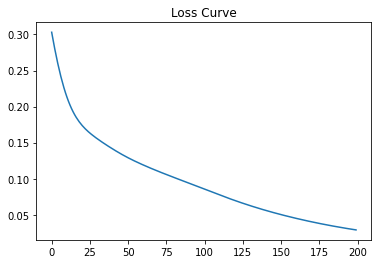

In [12]:
plt.plot(loss_curve, label='Train')
plt.title('Loss Curve')
plt.show()

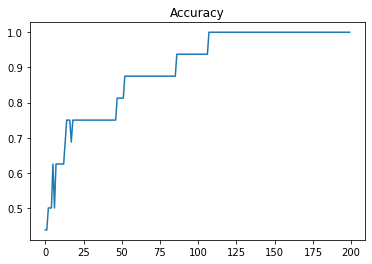

In [13]:
plt.plot(acc_curve, label='Train')
plt.title('Accuracy')
plt.show()

# Weights and biases from all the layers

### Layer 0

In [14]:
np.array(model.layers[0].weights)

<ipython-input-14-1339a590c593>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(model.layers[0].weights)


array([<tf.Variable 'dense/kernel:0' shape=(12, 8) dtype=float32, numpy=
       array([[-0.11153377,  0.07942592, -0.38426244,  0.16217227, -0.0200244 ,
               -0.33820793,  0.8314307 , -0.03395049],
              [-0.14635146,  0.10140324,  0.36809516, -0.72540325,  0.2873913 ,
               -0.7707429 , -0.130976  , -1.1454428 ],
              [-2.265692  , -0.43198538,  2.0375588 , -1.1911726 ,  2.109787  ,
                0.5824576 , -0.71631736, -1.9784982 ],
              [ 0.4618968 , -0.27594733, -0.64904153,  0.46436822, -0.32660693,
                0.6450036 , -0.97622883,  0.64991033],
              [-0.05715855, -0.5630634 , -0.02579928, -0.8811992 , -0.4500754 ,
               -0.46777484,  0.3545969 , -0.92196816],
              [-1.2803224 ,  0.5203795 ,  0.97975564,  1.4474124 ,  1.1606885 ,
                0.51101863, -1.1228125 , -1.4895883 ],
              [ 0.6887695 ,  0.20092338, -0.06358247,  1.0882657 , -0.62482166,
                1.2043755 , -0.260039

In [15]:
model.layers[0].bias.numpy()

array([ 0.35347465, -0.2654376 , -0.0691166 ,  0.39563668, -0.49643543,
       -0.43692923,  0.80318886,  0.11782648], dtype=float32)

### Layer 1

In [16]:
model.layers[1].weights

[<tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-1.0617248 ,  1.3915306 ,  1.0198866 , -2.497033  ],
        [ 0.37552378,  0.41910458,  0.309317  ,  0.09016163],
        [ 0.25321054, -1.5844562 , -1.5087634 ,  0.21370277],
        [ 0.5781714 , -0.8016348 ,  0.319122  , -2.2202477 ],
        [ 0.61160374, -0.45431486, -1.7326204 ,  1.6850389 ],
        [ 0.8895875 , -1.4270129 ,  0.69286484, -1.3953221 ],
        [-1.6144841 ,  0.75068593, -0.9647244 ,  0.599209  ],
        [-0.95212936, -1.0623331 ,  1.6446483 , -1.4673461 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([-0.64067215, -0.23536663, -0.61046463, -0.13536254], dtype=float32)>]

In [17]:
model.layers[1].bias.numpy()

array([-0.64067215, -0.23536663, -0.61046463, -0.13536254], dtype=float32)